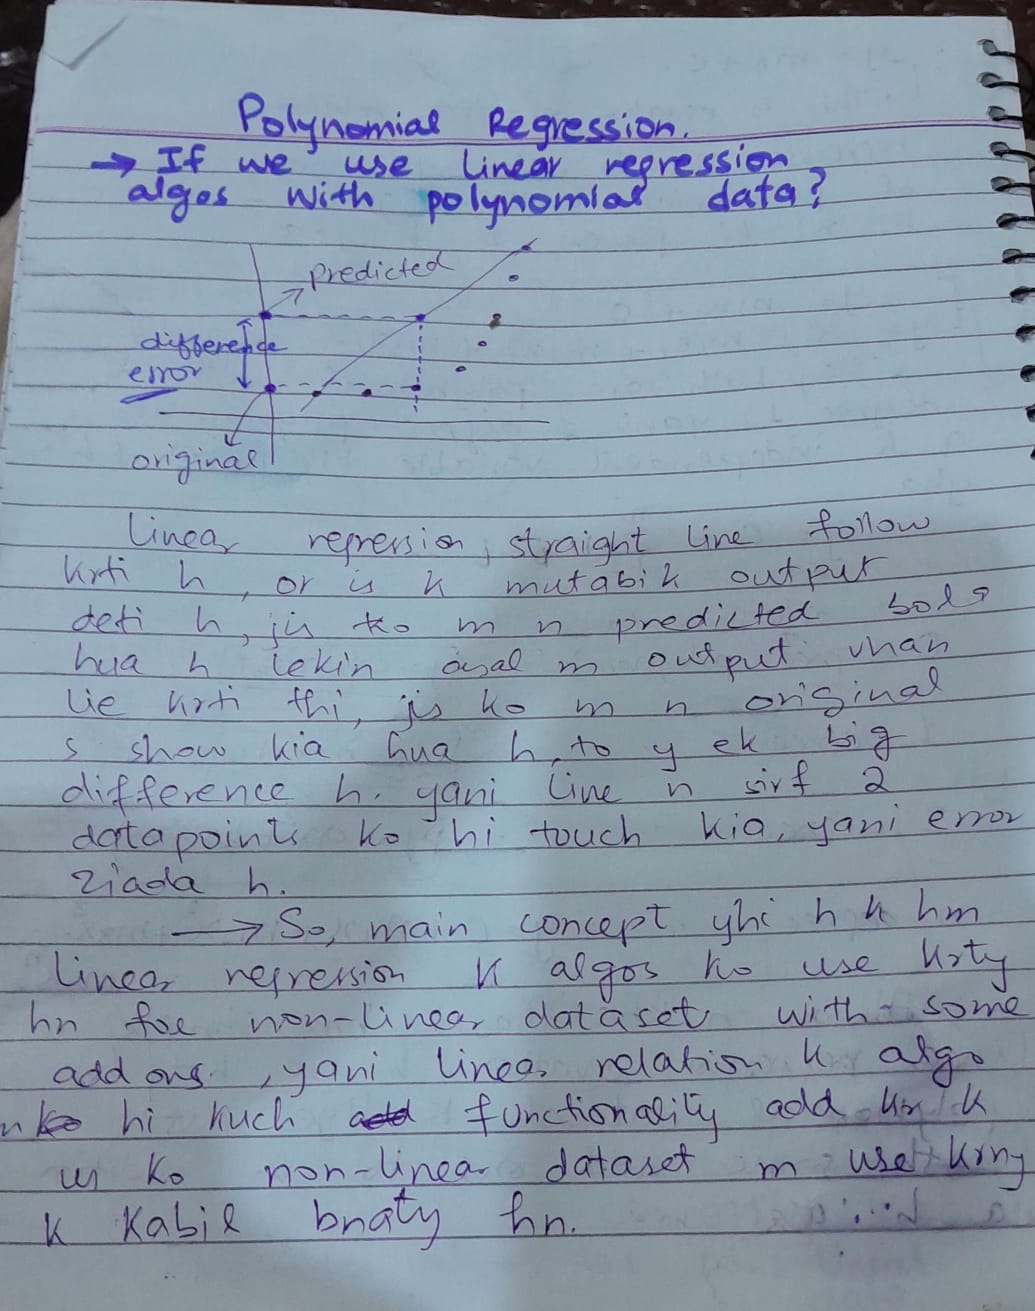

In [10]:
from IPython.display import Image
Image(filename='1.jpeg', width=300, height=300)

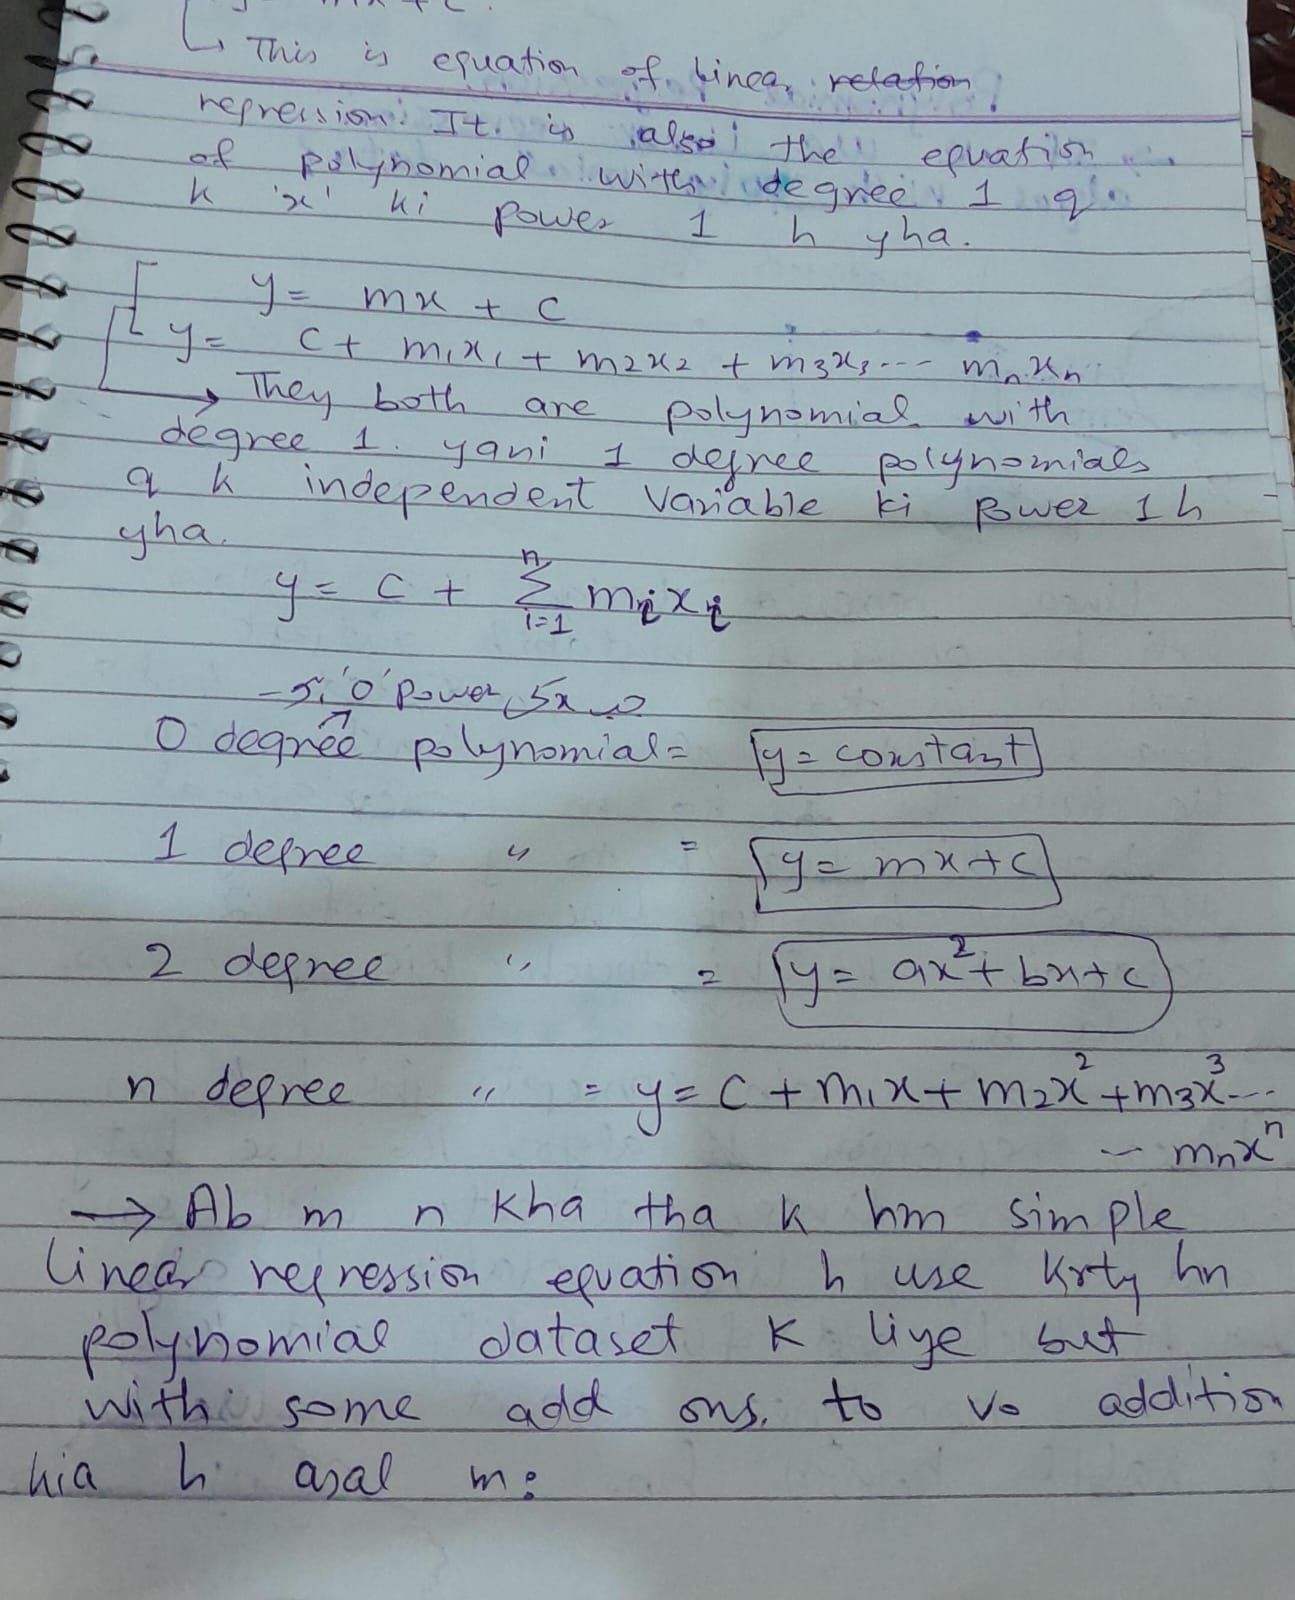

In [11]:
from IPython.display import Image
Image(filename='2.jpeg', width=300, height=300)

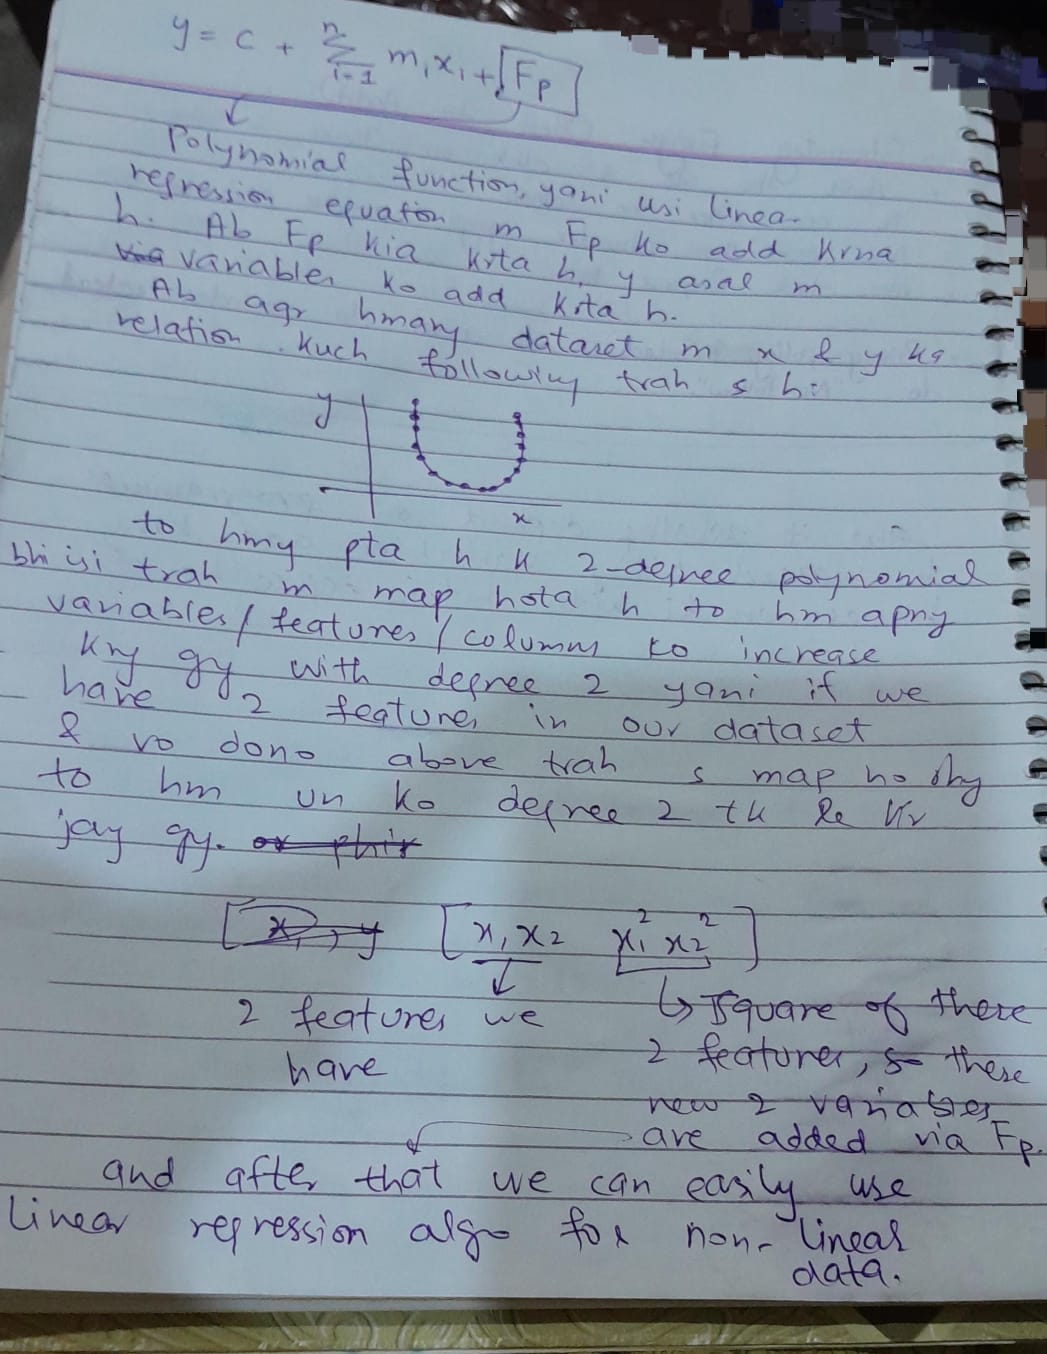

In [12]:
from IPython.display import Image
Image(filename='3.jpeg', width=300, height=300)

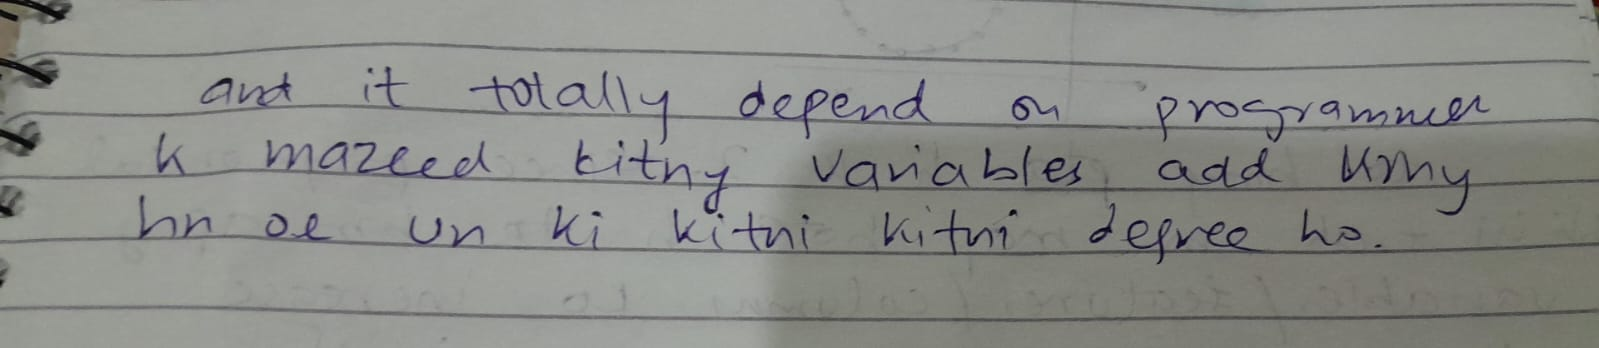

In [13]:
from IPython.display import Image
Image(filename='4.jpeg', width=300, height=300 

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
dataset=pd.read_csv("Position_Salaries.csv")
dataset.drop("Position", axis=1, inplace=True)

In [50]:
dataset

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [51]:
x=dataset[["Level"]]
y=dataset["Salary"]

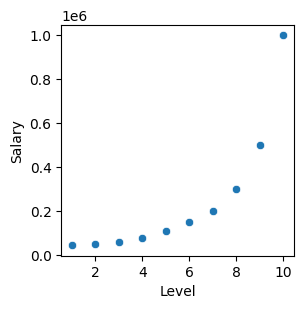

In [52]:
plt.figure(figsize=(3,3))
sns.scatterplot(x=dataset["Level"], y=y, data=dataset)
plt.show()
# yani linear relationship nhi h, to linear regression ka koi algo use nhi ho sky ga,,,,  is k liye hm non_linear regression 
# ka polynomial regression algo use kry gy

In [53]:
# agar hm is case m bhi linear reression without add-ones ko use krty hn to model underfitting ki stage m chla jata h
# so, now we are adding Fp to our data, phly degree 2 tak dekhty hn, agar best fit line mil gai to theek vrna 
# degree 3 ya 4 etc tak jayn gy...........  m n degree 2 rkha but score acha nhi aya, ab degree 3 pr acha a rha
from sklearn.preprocessing import PolynomialFeatures

In [54]:
pf=PolynomialFeatures(degree=3)
pf.fit(x)


PolynomialFeatures(degree=3)

In [55]:
x=pf.transform(x)  #m n is ko vapis usi x k ander daal dia, is ko fataframe m bhi convert kr skty but 
# problem y ati k thora lenghi h, cols ko name etc dena prta
x     
# ab jo array ai us ka col jo hota vo poory dataset m same rehta h (because it is actually 0 degree polynomial) or
# ab yhan hmary pas 1 hi feature tha
# to doosra col vhi feature h or teesra col us n hmary feature ka square kr k dia q k degree 2 rkhi thi.....  ab 4th col
# bhi aya h ek q k degree 3 kr di m n or is col m cube show ho rha

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [59]:
lr.score(x_test, y_test)

0.8765474238100345

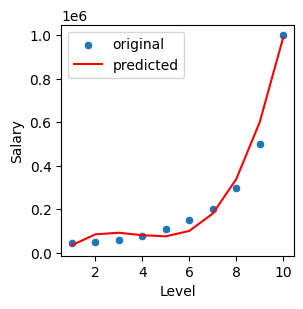

In [64]:
prd=lr.predict(x)
plt.figure(figsize=(3,3))
sns.scatterplot(x=dataset["Level"], y=y, data=dataset)
plt.plot(dataset["Level"], prd, color="red")
plt.legend(["original","predicted"])
plt.show()

In [73]:
# ab model to deploy kesy kryn gy?/
# jo bhi level user n daala to check salary, hm us data ko phly transform kryn gy or phir us ko predict m 
# daaly gy, e.g: user n level 10 dia, to hm phly is ko transform kryn gy:
user_input=10
user_input=pf.transform([[10]])
lr.predict(user_input)   # btw y jo output ai y vesy kuch kuch match krti h original output jo 
# honi chahye us s 

C:\Users\J11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([989975.65715119])

In [ ]:
# fit s asal m us n kia nikala, equation mery pas y thi:
# y = c + m1x +  m2x^2  + m3x^3

In [65]:
lr.coef_

array([     0.        , 158806.83424696, -45728.12080726,   4056.50803087])

In [66]:
lr.intercept_

-81788.63546112232

In [ ]:
so equation will be: 
y = (-81788.63546112232)  +  (158806.83424696 * x) + (-45728.12080726 * x^2) + (4056.50803087 * x^3)

In [67]:
	# 2	  50000
d=[[1.,    2.,    4.,    8.]]
lr.predict(d)

array([85364.61405071])

In [68]:
 (-81788.63546112232)  +  (158806.83424696 * 2) + (-45728.12080726 * 4) + (4056.50803087 * 8)

85364.61405071769

In [ ]:
# both answers are same